In [5]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, auc

In [6]:
dl_clinical_root = '/nas2/SMC_data_2101xx_EGFR_deeplearning/EGFR_deep_learning/3ch_img_minmax/result/test_ver2/img_clinical/'
dl_img_root = '/nas2/SMC_data_2101xx_EGFR_deeplearning/EGFR_deep_learning/3ch_img_minmax/result/Only_img_0.81'
clinical_root= '/nas2/SMC_data_2101xx_EGFR_deeplearning/EGFR_deep_learning/3ch_img_minmax/result/radiomic/clinical_rf'
radiomic_rf_root = '/nas2/SMC_data_2101xx_EGFR_deeplearning/EGFR_deep_learning/radiomics/210619_SH/result'

In [7]:
save_root = '/nas2/SMC_data_2101xx_EGFR_deeplearning/EGFR_deep_learning/3ch_img_minmax/result/test_ver2'

In [8]:
dl_label_df = pd.read_csv(os.path.join(dl_clinical_root, 'deep_learning_output_test.csv'))
dl_label = dl_label_df['real label'].to_numpy()
dl_prob_df = pd.read_csv(os.path.join(dl_clinical_root, 'deep_learning_prob_test.csv'))
dl_prob = dl_prob_df.to_numpy()

In [9]:
img_label_df = pd.read_csv(os.path.join(dl_img_root, 'deep_learning_output_test.csv'))
img_label = img_label_df['real label'].to_numpy()
img_prob_df = pd.read_csv(os.path.join(dl_img_root, 'deep_learning_prob_test.csv'))
img_prob = img_prob_df.to_numpy()

In [10]:
clinical_label_df = pd.read_csv(os.path.join(clinical_root, 'test_output.csv'))
clinical_label = clinical_label_df['real'].to_numpy()
clinical_prob_df = pd.read_csv(os.path.join(clinical_root, 'test_prob.csv'))
clinical_prob = clinical_prob_df[['label0', 'label1']].to_numpy()

In [11]:
rf_label_df = pd.read_csv(os.path.join(radiomic_rf_root, 'test_output.csv'))
rf_label = rf_label_df['real'].to_numpy()
rf_prob_df = pd.read_csv(os.path.join(radiomic_rf_root, 'test_prob.csv'))
rf_prob = rf_prob_df[['label0', 'label1']].to_numpy()

In [12]:
dl_label

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [13]:
fpr1, tpr1, threshold1 = roc_curve(dl_label.reshape(37, ), dl_prob[:,0], pos_label = 0)
roc_auc1 = auc(fpr1, tpr1)
auc_score1 = roc_auc_score(dl_label, dl_prob[:, 1])

In [14]:
dl_label

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [15]:
roc_auc1

0.8533333333333333

In [16]:
auc_score1

0.8533333333333333

In [17]:
fpr2, tpr2, threshold2 = roc_curve(clinical_label.reshape(36, ), clinical_prob[:,0], pos_label = 0)
roc_auc2 = auc(fpr2, tpr2)
auc_score2 = roc_auc_score(clinical_label, clinical_prob[:, 1])

In [18]:
roc_auc2

0.5

In [19]:
auc_score2

0.5

In [20]:
fpr3, tpr3, threshold3 = roc_curve(rf_label.reshape(36, ), rf_prob[:,0], pos_label = 0)
roc_auc3 = auc(fpr3, tpr3)
auc_score3 = roc_auc_score(rf_label, rf_prob[:, 1])

In [21]:
roc_auc3

0.5329861111111112

In [22]:
auc_score3

0.5329861111111112

In [23]:
fpr4, tpr4, threshold4 = roc_curve(img_label.reshape(37, ), img_prob[:,0], pos_label = 0)
roc_auc4 = auc(fpr4, tpr4)
auc_score4 = roc_auc_score(img_label, img_prob[:, 1])

In [24]:
roc_auc4

0.8066666666666666

In [25]:
auc_score4

0.8066666666666668

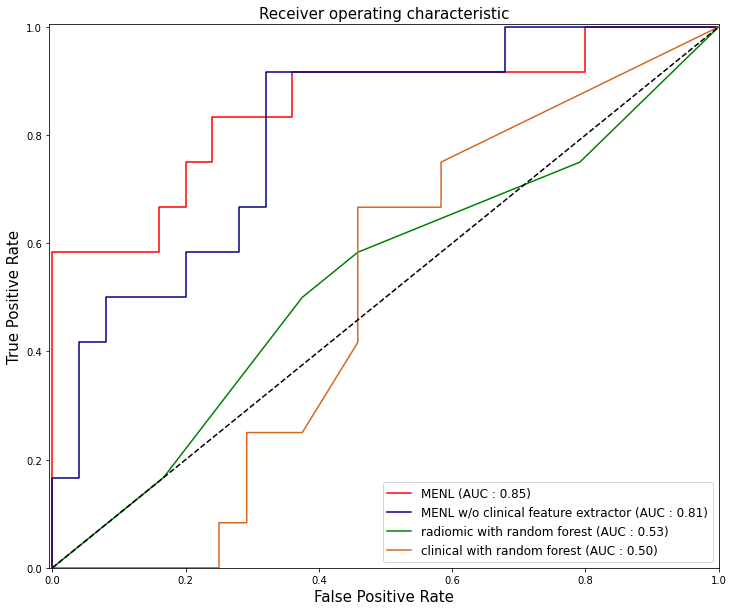

In [28]:
plt.plot(fpr1,tpr1, color = 'red', label='MENL (AUC : {:.2f})'.format(roc_auc1))
plt.plot(fpr4,tpr4, color = 'navy', label='MENL w/o clinical feature extractor (AUC : {:.2f})'.format(roc_auc4))
plt.plot(fpr3,tpr3, color = 'green', label='radiomic with random forest (AUC : {:.2f})'.format(roc_auc3))
plt.plot(fpr2,tpr2, color = 'chocolate', label='clinical with random forest (AUC : {:.2f})'.format(roc_auc2))

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.005, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 15)
plt.legend(fontsize = 12, loc='lower right')
fig = plt.gcf()
fig.set_size_inches(12, 10)
fig.savefig(save_root + '/roc_curve_final.png', dpi = fig.dpi)
plt.show()